# Find Next Big Thing 
Single function to run the Next Big Thing processing

### Imports

In [1]:
# Standard Python Library Imports
import importlib
import import_ipynb
from datetime import date, timedelta

# Imports from Next Big Thing Jupyter Notebooks
#Find Category
import Step1_Find_Category_From_Thing as fcat

#Find subreddits
import Step2_Find_Subreddits as fsub

#Find influencers
import Step3_Find_Influencers as finf

#Find relevant influencer posts
import Step4_Find_Influencer_Relevant_Posts as fposts

#Create CRF model to find new terms in unseen Reddit posts
import Step5_CRF_Find_New_Terms as crfnt

importing Jupyter notebook from Step1_Find_Category_From_Thing.ipynb


2022-04-23 15:43:17 INFO: Downloading default packages for language: en (English)...
2022-04-23 15:43:20 INFO: File exists: /root/stanza_resources/en/default.zip.
2022-04-23 15:43:27 INFO: Finished downloading models and saved to /root/stanza_resources.
Installing /root/venv/lib/python3.7/site-packages/widgetsnbextension/static -> jupyter-js-widgets
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js
Up to date: /usr/local/share/jupyter/nbextensions/jupyter-js-widgets/extension.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable widgetsnbextension --py
    
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/deepnote-config/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/deepnote-config/ju

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

importing Jupyter notebook from Step5_CRF_Find_New_Terms.ipynb


2022-04-23 15:43:56 INFO: Downloading default packages for language: en (English)...
2022-04-23 15:44:01 INFO: File exists: /root/stanza_resources/en/default.zip.
2022-04-23 15:44:09 INFO: Finished downloading models and saved to /root/stanza_resources.
2022-04-23 15:44:09 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2022-04-23 15:44:09 INFO: Use device: cpu
2022-04-23 15:44:09 INFO: Loading: tokenize
2022-04-23 15:44:09 INFO: Loading: pos
2022-04-23 15:44:10 INFO: Done loading processors!
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


### Next Big Thing Function

In [2]:
def find_next_big_thing(term, mvp_flag, num_subreddits=10, min_subreddit_subscribers=20000, 
                        num_submissions=50, num_influencers=5, min_occur=2, max_com=0, 
                        load_subm=False, equal_sub=True, per_author_limit=500, post_limit=10000,
                        num_days=30):
    ''' This function finds entities found in Reddit posts (submissions and comments) that are 
        in the same category as the term entered and have been mentioned recently.

    Inputs:
    mvp_flag - Minimum viable product flag, if true it uses an existing pickle file of results,
                otherwise it runs the term through the full process
    num_subreddits - Number of subreddits we will return for the analysis, default is 10
    min_subreddit_subscribers - Size limit on a subreddit for inclusion in analysis, default is
                                20000 
    num_submissions - Number of submissions retrieved for each subreddit, default is 50
    num_influencers - Number of influencers returned as a ranked list - use equal sub to adjust oveall or 
                      per subreddit, default is 5
    min_occur - Minimum number of times a redditor must appear in ranking list, default is 2
    max_com  - Maximum comment request limit (32 per request) for a submission (0 retrieves all), 
                default is 0
    load_subm - Loads pickle file if available for posts versus retrieving through api, 
                default is False
    equal_sub - If true, changes function to return an num_influencers from each subreddit, 
                default is True 
    per_author_limit - Maximum number of comments to be returned for one user, default is 500
    post_limit - Maximum number of comments/submissions to return from this process, default 
                 is 10000
    num_days - Number of recent days for finding relevant posts, default is 30

    Output:
    nbt_df - Dataframe containing entities, which are the resultant siblings of the term, 
             with counts based on CRF matches, exact CRF matches, and Whitelist matches
    '''

    #Set up dates for Reddit API
    start_date = (date.today() - timedelta(days=num_days + 1)).strftime("%m/%d/%Y") #Posts dated after this date will be included
    end_date = (date.today() + timedelta(days=1)).strftime("%m/%d/%Y")  #Posts dated before this date will be included
    
    #Step 1: Get category data
    nlp_cat_phrase, wiki_cats, best_wiki_cats, wiki_term = fcat.get_category_from_search_term(term)

    #Step 2: Get subreddits
    subreddits_list = fsub.get_subreddits(wiki_term, nlp_cat_phrase, best_wiki_cats, num_subreddits, min_subreddit_subscribers, mvp_flag)

    #Step 3: Get influencers
    listInfluencers = finf.get_influencers(subreddits_list, num_submissions, num_influencers, min_occur, mvp_flag, load_subm, wiki_term, max_com, equal_sub)

    #Step 4: Get relevant posts
    relevant_posts = fposts.get_relevant_posts(wiki_term, listInfluencers, subreddits_list, start_date, end_date, best_wiki_cats, per_author_limit, post_limit, mvp_flag)

    #Step 5: Find and rank top results
    nbt_df = crfnt.calculate_final_results_for_wiki_term(wiki_term, mvp_flag)

    return nbt_df

### Call Next Big Thing Function 
Here is where you can enter your new term, or quickly recreate the results for one that has already been run. Our MVP (Minimum Viable Product) mode uses pre-created pickle files for selected topics that have already been run through the full pipeline to quickly generate a result for viewing.

MVP files are available for: 
- Squid Game
- cronut
- Settlers of Catan
- dogecoin
- Beastie Boys
- Elon Musk
- Birkin Bag
- Apple Iphone
- PS5
- oxycontin

Each time a term is run through where mvp_flag is set to False, it will then be available to run in MVP mode in the future


In [3]:


# nbt_df = find_next_big_thing('Covid-19', mvp_flag=False)

nbt_df = find_next_big_thing('Virtual Reality', mvp_flag=True)






TypeError: get_category_from_search_term() missing 1 required positional argument: 'mvp_flag'

### Output

In [ ]:
print('The top 10 items found for the Next Big Thing are:')


nbt_df[['Entity','CRF_Model_Found']].head(10)

The top 10 items found for the Next Big Thing are:
['FOVEATED RENDERING', 'MIXED REALITY', 'OPENXR', 'GOGGLES', 'AVATAR', 'VIRTUAL DESKTOP', 'INTERNET', 'GOOGLE EARTH VR', 'VIRTUAL WORLD', 'UNREAL ENGINE']


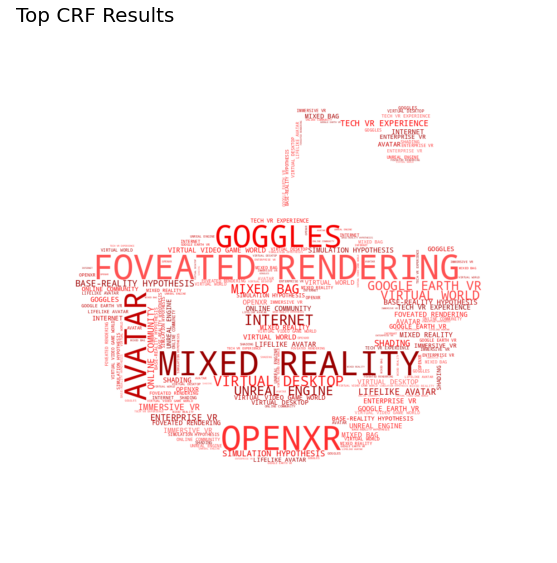

In [ ]:

crfnt.make_wordcloud(nbt_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=90b052a7-f47d-474e-888f-9345355cfd9a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>